In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *
import random
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from IPython.display import display, Math, Latex


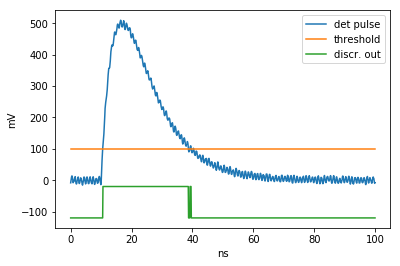

t1 : 10.539 ns, tot : 28.172 ns


In [2]:
##################################################
##             basic discriminator              ##
##################################################


t = np.linspace(0,100e-9,1000) # be sure to make not to few steps, if you have a sharp IR

Q = 200e-12
tau1 = 5e-9
tau2 = 10e-9
delay = 10e-9

#det = square_pulse(t,leading_edge=5e-9, trailing_edge=5e-9,on_val=0.5,delay=10e-9, width=50e-9)

det = detector_signal_function(t, Q, tau1, tau2, delay)

noise = 2e-3
noise_bw = 1e9

sine_freq = 1000e6
sine_amp  = 10e-3
rand_phase = 2*np.pi*random.random()

sine_y = sine_amp * np.sin(2*np.pi*t*sine_freq+rand_phase)

hyst = 5e-3

y = add_noise(t,det,rms=noise,bw=noise_bw)
y += sine_y

thresh = 100e-3

discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)


plt.plot(t*1e9,y*1e3,label="det pulse")
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold")
plt.plot(t*1e9,discr*100-120,label="discr. out")
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

print("t1 : {:3.3f} ns, tot : {:3.3f} ns".format(t1*1e9,tot*1e9))

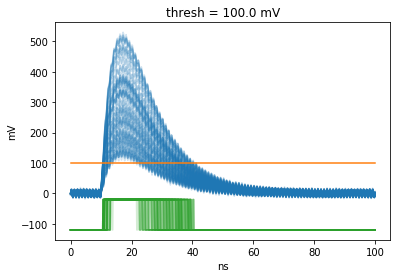

In [3]:
##################################################
##                  1GHz sine                   ##
##################################################


t1_list  = []
tot_list = []

sine_freq = 1000e6


for i in range(0,50000):
  rand_phase = 0 #2*np.pi*random.random()
  rand_ampl = random.random()*400e-3+120e-3
  y = rand_ampl*det/500e-3 
  y = add_noise(t,y,rms=noise,bw=noise_bw)
  sine_y = sine_amp * np.sin(2*np.pi*t*sine_freq+rand_phase)
  y += sine_y
  discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)
  t1_list  += [t1]
  tot_list += [tot]
  if (i < 80):
    alpha = 0.2
    plt.plot(t*1e9,y*1e3,label="det pulse",color=colors[0],alpha=alpha)
    plt.plot(t*1e9,discr*100-120,label="discr. out",color=colors[2],alpha=alpha)
    
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold",color=colors[1])
plt.xlabel("ns")
plt.ylabel("mV")
plt.title("thresh = {:3.1f} mV".format(thresh*1e3))
plt.show()
    
t1_a = np.array(t1_list)
tot_a = np.array(tot_list)



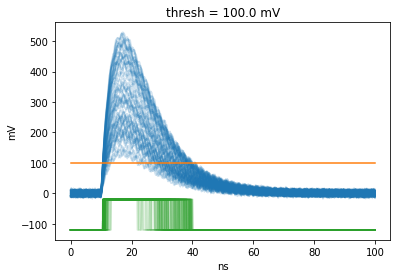

In [4]:
##################################################
##                 500 MHz sine                 ##
##################################################


t1_list  = []
tot_list = []

sine_freq = 500e6


for i in range(0,50000):
  rand_phase = 2*np.pi*random.random()
  rand_ampl = random.random()*400e-3+120e-3
  y = rand_ampl*det/500e-3 
  y = add_noise(t,y,rms=noise,bw=noise_bw)
  sine_y = sine_amp * np.sin(2*np.pi*t*sine_freq+rand_phase)
  y += sine_y
  discr, t1, tot = discriminate(t,y,thresh,hysteresis=hyst)
  t1_list  += [t1]
  tot_list += [tot]
  if (i < 80):
    alpha = 0.2
    plt.plot(t*1e9,y*1e3,label="det pulse",color=colors[0],alpha=alpha)
    plt.plot(t*1e9,discr*100-120,label="discr. out",color=colors[2],alpha=alpha)
    
plt.plot(t*1e9,y*0+thresh*1e3,label="threshold",color=colors[1])
plt.xlabel("ns")
plt.ylabel("mV")
plt.title("thresh = {:3.1f} mV".format(thresh*1e3))
plt.show()
    
t1_b = np.array(t1_list)
tot_b = np.array(tot_list)



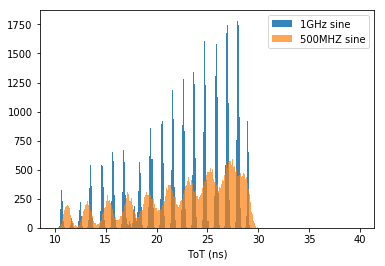

In [5]:
bins = np.arange(10,40,0.1)
plt.hist(remove_nan(tot_a*1e9),bins=bins,alpha=0.9,label="1GHz sine")
plt.hist(remove_nan(tot_b*1e9),bins=bins,alpha=0.7,label="500MHZ sine")

plt.xlabel("ToT (ns)")
plt.legend()



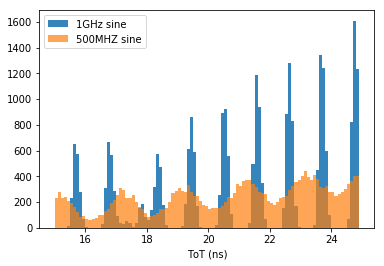

In [6]:
bins = np.arange(15,25,0.1)
plt.hist(remove_nan(tot_a*1e9),bins=bins,alpha=0.9,label="1GHz sine")
plt.hist(remove_nan(tot_b*1e9),bins=bins,alpha=0.7,label="500MHZ sine")

plt.xlabel("ToT (ns)")
plt.legend()

